## Exercise 2.3 Fundamentals of Visualization libraries - Part 1 -Matplotlib

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [3]:
import matplotlib
matplotlib.__version__

'3.7.1'

## Importing dataset from part 2, step 8 of Exercise 2.2

In [ ]:
df_merged = pd.read_csv('NewYork_Bikes_data.csv', index_col = 0)

C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_23852\3332620009.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv('NewYork_Bikes_data.csv', index_col = 0)


In [ ]:
df_merged.columns

In [ ]:
df_merged.drop(columns = {'_merge'}, inplace = True)

In [ ]:
df_merged.head()

In [ ]:
df_merged.shape

In [ ]:
df_merged.dtypes

In [ ]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [ ]:
df_merged.dtypes

## Creating a line plot of the temperatures for 2022 plotted as time series using the weather dataframe using pandas plotting function.

In [ ]:
# Extracting temperature data for plotting
df_temp = df_merged[['date', 'avgTemp']].drop_duplicates()

In [ ]:
df_temp.shape

In [ ]:
# Setting date as the index for the temperature DataFrame
df_temp.set_index('date', inplace=True)

In [ ]:
df_temp.head()

In [ ]:
# I had to remove duplicates by taking the mean temperature for each date which is same as df_temp (weather data csv) from exercise 2.2.
df_temp_clean = df_temp.groupby('date')['avgTemp'].mean()

In [ ]:
df_temp_clean.head()

In [ ]:
df_temp_clean.plot(xlabel= 'Year 2022',ylabel='Average Temperature')


## Creating a column with the count of trips per day and merging it with the weather dataframe.

In [21]:
df_merged.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [22]:
# Groupby the count of the trips 
df_group = pd.DataFrame(df_merged.groupby(['date'])['ride_id'].count()).reset_index()

In [24]:
# Renaming the ride_id column as trip_count for clarity.
df_group.rename(columns = {'ride_id':'trip_count'}, inplace = True)
# Merging trip count data with weather data.
df_final = df_merged.merge(df_group, on = 'date', how = 'outer', indicator = True)
print(df_final['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df_final[df_final['date'] == '2022-01-01'].shape) # Check
print("Shape of January 2nd is", df_final[df_final['date'] == '2022-01-02'].shape) # Second check

_merge
both          30689921
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20895, 17)
Shape of January 2nd is (44234, 17)


In [25]:
df_merged = df_final.set_index('date')
print(df_merged.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'trip_count', '_merge'],
      dtype='object')


In [26]:
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,trip_count,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,68FDAB9B6656A4DF,classic_bike,2022-01-01 05:11:08,2022-01-01 05:15:25,W 21 St & 6 Ave,6140.05,W 11 St & 6 Ave,5914.03,40.741740,-73.994156,40.735324,-73.998004,member,11.6,20895,both
2022-01-01,91C955306D2CF8A6,electric_bike,2022-01-01 20:54:00,2022-01-01 21:06:39,Bedford Ave & Nassau Ave,5550.05,Sharon St & Olive St,5323.05,40.723117,-73.952123,40.715353,-73.938560,member,11.6,20895,both
2022-01-01,B379B77AEB677F2A,electric_bike,2022-01-01 15:48:06,2022-01-01 16:44:21,Central Park W & W 91 St,7453.01,5 Ave & E 87 St,7323.09,40.788665,-73.966801,40.782323,-73.959875,casual,11.6,20895,both
2022-01-01,1F1368CC1EEDA296,electric_bike,2022-01-01 02:32:52,2022-01-01 02:44:51,West End Ave & W 78 St,7340.07,W 44 St & 11 Ave,6756.05,40.783786,-73.981687,40.762009,-73.996975,casual,11.6,20895,both
2022-01-01,9FE4ABC81014D80D,electric_bike,2022-01-01 17:43:17,2022-01-01 17:52:31,Lawrence St & Willoughby St,4596.09,Carroll St & 6 Ave,4019.06,40.692362,-73.986317,40.674089,-73.978728,member,11.6,20895,both


## Creating a line chart of bike trip counts and temperatures plotting on a dual axis. 

#### Object oriented approach

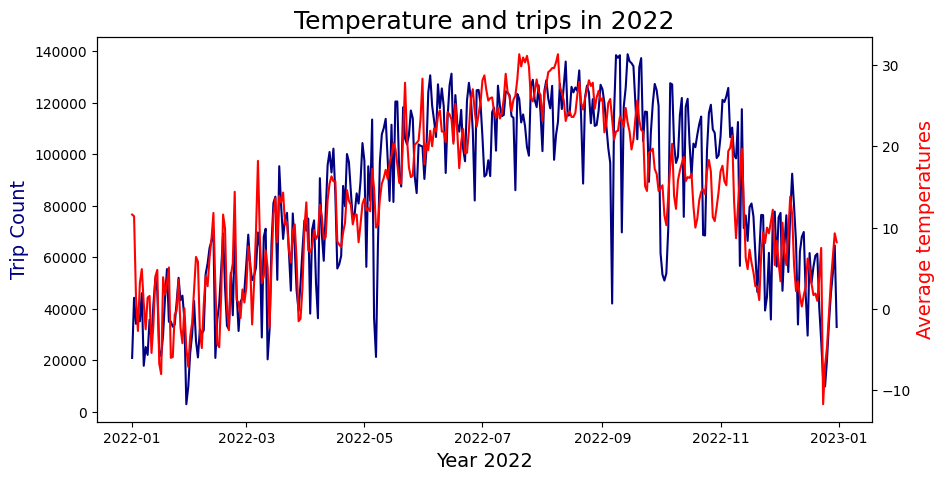

In [31]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_merged['trip_count'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Trip Count",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plotax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_merged['avgTemp'], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### One of the main strength of matplotlib is plotting multiple visualizations in the same plot. I have used object oriented paradigm of matplotlib for creating this plot because it allows to create multiple axes (subplots) and twin axes (primary and secondary y axis) within a single figure. This is very helpful to make comparision and have easy visualization between trip counts and average temperature for the year 2022.
### It can be noticed that the two lines plotted together above are on a comparative scale. There’s a correlation between these two variables as it looks like they follow a very similar trend.

#### (a) In the first line of code there is Figure and Subplots created. 
fig,ax = plt.subplots(figsize=(10, 5))
#### The code first initates a figure (fig) and subplots (ax) within that figure. Also width and height of fig is specified in the code.


#### (b) Second code shows the plot for trip count.
ax.plot(df_merged['trip_count'],color = "navy")
#### This plots the 'trip_count' data from dataFrame (df_merged) on the primary y-axis (ax). 

#### (c)Third code sets the Axes Labels (x and y axes)
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label 

ax.set_ylabel("Trip Count",color = "navy", fontsize = 14) # set y-axis label 

#### (d)Then, with twinx()function, I create the dual axis - initializing a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

#### (e) This creates a twin axes (ax2) that shares the same x-axis but has a different y-axis. Basically, it is obtaining a plot with the temperatures on the y-axis using second axis object.
   ax2.plot(df_merged['avgTemp'], color = "red")
#### The above code plots the 'avgTemp' data from the DataFrame on the secondary y-axis (ax2) and the line is colored red.
  ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
#### This code Sets the label for the secondary y-axis. The color is red to ensure consistency with the line color.


